In [10]:
import os
import librosa
import librosa.display
from pydub import AudioSegment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle

/Users/ruoqigao/opt/anaconda3/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [11]:
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [23]:
tracks=pd.read_csv('tracks.csv',index_col=0, header=[0, 1])
tracks_small=tracks[tracks[('set', 'subset')]=='small'][[('track','genre_top')]]

In [24]:
tracks_small[('track','genre_top')].unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International',
       'Electronic', 'Instrumental'], dtype=object)

In [25]:
track_small=tracks_small.reset_index()
track_small['track_id']=track_small.track_id.astype(str)
track_small['track_id']=track_small.track_id.apply(lambda x: x.zfill(6))
track_small.columns = track_small.columns.droplevel(0)
track_small.columns = ['track_id', 'genre']
track_small.head()

,track_id,genre
0,000002,Hip-Hop
1,000005,Hip-Hop
2,000010,Pop
3,000140,Folk
4,000141,Folk


In [26]:
sr = 22050
n_fft = 512
hop_length = n_fft // 2
n_mels = 64 

In [27]:
all_dir=r'slice/'
melspec_all=[]
id_all=[]
for subdir, dirs, files in os.walk(all_dir):
    for file in files:
        if file.endswith(".wav"):
            track_id=os.path.splitext(file)[0]
            id_all.append(track_id)
            wav=os.path.join(subdir, file)
            y, sr = librosa.load(wav)
            melspec = librosa.feature.melspectrogram(y=y, hop_length = hop_length, n_fft = n_fft, n_mels = n_mels)
            melspec = librosa.power_to_db(melspec**2)
            melspec_all.append(melspec)

In [28]:
melspec_all_flat=[]
id_all_new=[]
for i in range(len(melspec_all)):
    flat=melspec_all[i].flatten()
    if flat.shape[0]==11072:
        id_all_new.append(id_all[i])
        melspec_all_flat.append(flat)

In [29]:
a=np.hstack(melspec_all_flat)

In [30]:
X=np.reshape(a,(len(melspec_all_flat),melspec_all_flat[0].shape[0]))

In [31]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca = PCA(n_components=15)
X=pca.fit_transform(X)

In [32]:
pca.explained_variance_ratio_.sum()

0.7587545

In [33]:
top_pcs=pd.DataFrame(X,index=id_all_new)
top_pcs=top_pcs.reset_index()

In [34]:
top_pcs

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,070654.2,-83.195206,4.412231,-0.415567,24.464361,-16.235899,10.558423,10.166789,-3.489009,2.984859,3.895413,5.070197,0.386923,-8.065082,-1.928267,-0.869973
1,030487.1,-57.062031,-13.643297,-16.955065,9.513846,3.378551,-0.341306,4.669872,-4.042832,-2.149617,4.321544,1.427561,3.998030,8.385368,10.773198,6.720836
2,119025.1,-35.596806,12.893382,36.285965,15.102425,-12.003945,1.479569,-3.971082,-30.437498,-1.515765,-13.392260,10.491503,-0.078193,-2.449542,-12.307391,0.436830
3,090527.2,16.110846,-64.160873,-10.233799,13.367370,-8.348937,-7.680329,-0.081496,13.642767,-4.026620,2.180220,4.328644,-0.422539,5.848071,-18.936266,8.553561
4,073779.0,-60.154316,37.025024,7.383249,8.760235,-9.151628,-3.786525,-2.292314,-1.558813,-2.901635,3.805534,-2.020096,1.329762,1.092284,1.621001,-0.503048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31971,127208.0,73.067963,-10.094894,-28.690256,6.236036,19.921425,10.027648,6.948371,9.947612,-5.790867,-8.024620,2.135716,-1.591983,5.954713,1.502687,5.339966
31972,009553.1,77.585968,-3.338862,-26.326838,-8.987707,-0.170610,20.791348,8.738400,-0.412187,4.413648,2.802522,2.078187,3.775140,3.274597,-1.724876,6.971478
31973,011916.0,-40.212021,30.258074,-0.731550,4.480309,-10.036102,-1.318532,1.419383,2.086238,0.817054,7.696763,-8.734378,-6.190538,4.161034,-0.995121,-1.266173
31974,056696.3,-81.931427,42.603664,8.594470,9.342199,-2.194518,0.311096,-4.220047,-0.483103,-9.731819,3.367578,3.358001,2.292953,-7.640661,-2.970137,1.273689


In [35]:
top_pcs['id']=top_pcs['index'].str.split('.').str[0]

In [36]:
pc=top_pcs.merge(track_small,left_on='id',right_on='track_id')
pc

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,id,track_id,genre
0,070654.2,-83.195206,4.412231,-0.415567,24.464361,-16.235899,10.558423,10.166789,-3.489009,2.984859,3.895413,5.070197,0.386923,-8.065082,-1.928267,-0.869973,070654,070654,Hip-Hop
1,070654.3,-83.998344,5.873324,-3.962225,22.021841,-12.824759,-1.162843,11.259046,-3.021707,6.666527,-5.018040,6.216535,0.735591,-1.501226,-5.992141,-6.595107,070654,070654,Hip-Hop
2,070654.1,-57.253948,23.506134,-1.509243,10.199611,0.866224,-1.828669,8.392946,-4.016385,7.917025,-2.199054,-2.880552,-6.759861,4.993314,-0.419071,9.892708,070654,070654,Hip-Hop
3,070654.0,-59.591759,16.507372,-6.758457,11.219107,-10.078834,-18.675684,12.546071,-5.349100,-4.571664,7.295524,-0.760591,-3.551075,3.540122,0.752227,4.029626,070654,070654,Hip-Hop
4,030487.1,-57.062031,-13.643297,-16.955065,9.513846,3.378551,-0.341306,4.669872,-4.042832,-2.149617,4.321544,1.427561,3.998030,8.385368,10.773198,6.720836,030487,030487,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31971,125299.3,-42.194477,25.930420,1.510181,5.193192,-13.808722,-0.507625,2.069068,-5.358631,2.938059,-1.767087,2.151449,3.708460,6.655853,-0.248061,-1.278647,125299,125299,Electronic
31972,098236.1,-9.942113,-31.712393,-30.301983,12.073134,-21.086260,1.210128,10.657569,7.623047,0.518107,7.877304,-1.020038,-0.375926,-1.681623,2.458451,-2.776968,098236,098236,Instrumental
31973,098236.0,-10.959825,-21.998116,-30.156189,10.581676,-18.820526,-2.844725,12.336494,4.022035,3.040430,7.454702,0.003414,1.814637,-2.131459,1.788908,-3.438194,098236,098236,Instrumental
31974,098236.2,-6.806840,-39.414448,-27.717424,14.312831,-25.301420,0.126528,8.933777,7.698682,0.614458,5.755631,0.572255,3.483746,2.090512,2.684557,-1.768415,098236,098236,Instrumental


In [37]:
index_cat_match=pc.loc[:,('index','genre')]
index_cat_match
label_match=index_cat_match.set_index('index')['genre'].to_dict()
label_match

{'070654.2': 'Hip-Hop',
 '070654.3': 'Hip-Hop',
 '070654.1': 'Hip-Hop',
 '070654.0': 'Hip-Hop',
 '030487.1': 'Pop',
 '030487.0': 'Pop',
 '030487.2': 'Pop',
 '030487.3': 'Pop',
 '119025.1': 'Experimental',
 '119025.0': 'Experimental',
 '119025.2': 'Experimental',
 '119025.3': 'Experimental',
 '090527.2': 'Instrumental',
 '090527.3': 'Instrumental',
 '090527.1': 'Instrumental',
 '090527.0': 'Instrumental',
 '073779.0': 'International',
 '073779.1': 'International',
 '073779.3': 'International',
 '073779.2': 'International',
 '043843.0': 'Folk',
 '043843.1': 'Folk',
 '043843.3': 'Folk',
 '043843.2': 'Folk',
 '097037.2': 'Hip-Hop',
 '097037.3': 'Hip-Hop',
 '097037.1': 'Hip-Hop',
 '097037.0': 'Hip-Hop',
 '057968.2': 'Rock',
 '057968.3': 'Rock',
 '057968.1': 'Rock',
 '057968.0': 'Rock',
 '121474.1': 'Instrumental',
 '121474.0': 'Instrumental',
 '121474.2': 'Instrumental',
 '121474.3': 'Instrumental',
 '055826.3': 'International',
 '055826.2': 'International',
 '055826.0': 'International',
 '

In [39]:
label_match_df=pd.DataFrame(list(label_match.items()),columns = ['code','label']) 

In [40]:
label_match_df.to_csv(r'label_match.csv',index=False)

In [41]:
X=pc.drop(['genre','track_id','id','index'],axis=1)
y=pc.genre

In [42]:
pc.groupby('genre').count()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,id,track_id
genre,,,,,,,,,,,,,,,,,,
Electronic,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996
Experimental,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996
Folk,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Hip-Hop,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988
Instrumental,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
International,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Pop,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
Rock,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 0) 
  
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 10,weights='distance').fit(X_train, y_train) 
  
# accuracy
accuracy_train = knn.score(X_train, y_train) 
print(accuracy_train)

accuracy_test= knn.score(X_test, y_test) 
print(accuracy_test)

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

0.9997915102993912
0.4395796847635727


In [44]:
print(classification_report(y_test, knn_predictions))

               precision    recall  f1-score   support

   Electronic       0.41      0.39      0.40      1040
 Experimental       0.45      0.39      0.42       987
         Folk       0.45      0.46      0.45       937
      Hip-Hop       0.43      0.61      0.50       959
 Instrumental       0.46      0.38      0.42       993
International       0.42      0.42      0.42      1029
          Pop       0.36      0.27      0.31      1031
         Rock       0.50      0.61      0.55      1018

     accuracy                           0.44      7994
    macro avg       0.44      0.44      0.43      7994
 weighted avg       0.44      0.44      0.43      7994



In [45]:
dummy=DummyClassifier().fit(X_train,y_train)
dummy_predictions=dummy.predict(X_test)
print(classification_report(y_test,dummy_predictions))

               precision    recall  f1-score   support

   Electronic       0.11      0.11      0.11      1040
 Experimental       0.13      0.14      0.13       987
         Folk       0.12      0.13      0.13       937
      Hip-Hop       0.11      0.11      0.11       959
 Instrumental       0.12      0.13      0.13       993
International       0.13      0.12      0.12      1029
          Pop       0.13      0.12      0.12      1031
         Rock       0.14      0.14      0.14      1018

     accuracy                           0.12      7994
    macro avg       0.12      0.12      0.12      7994
 weighted avg       0.12      0.12      0.12      7994



/Users/ruoqigao/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [46]:
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=12)
clf.fit(X_train, y_train)
svm_predictions=clf.predict(X_test)
cm = confusion_matrix(y_test, svm_predictions) 
accuracy_train = clf.score(X_train, y_train) 
print(accuracy_train)

accuracy_test= clf.score(X_test, y_test) 
print(accuracy_test)

0.4820698857476441
0.40905679259444583


In [47]:
print(classification_report(y_test, svm_predictions))

               precision    recall  f1-score   support

   Electronic       0.38      0.29      0.33      1040
 Experimental       0.43      0.28      0.34       987
         Folk       0.38      0.55      0.45       937
      Hip-Hop       0.41      0.60      0.48       959
 Instrumental       0.39      0.40      0.39       993
International       0.41      0.41      0.41      1029
          Pop       0.33      0.18      0.23      1031
         Rock       0.51      0.59      0.55      1018

     accuracy                           0.41      7994
    macro avg       0.40      0.41      0.40      7994
 weighted avg       0.40      0.41      0.40      7994



In [48]:
gb=GradientBoostingClassifier().fit(X_train,y_train)
accuracy = gb.score(X_test, y_test) 

In [49]:
gb_predictions = gb.predict(X_test)
print(classification_report(y_test, gb_predictions))

               precision    recall  f1-score   support

   Electronic       0.36      0.27      0.31      1040
 Experimental       0.39      0.24      0.30       987
         Folk       0.36      0.51      0.42       937
      Hip-Hop       0.41      0.56      0.47       959
 Instrumental       0.36      0.39      0.37       993
International       0.35      0.37      0.36      1029
          Pop       0.27      0.16      0.20      1031
         Rock       0.50      0.57      0.53      1018

     accuracy                           0.38      7994
    macro avg       0.37      0.38      0.37      7994
 weighted avg       0.37      0.38      0.37      7994



In [51]:
rf=RandomForestClassifier().fit(X_train,y_train)
rf_predictions=rf.predict(X_test)
print(classification_report(y_test,rf_predictions))

               precision    recall  f1-score   support

   Electronic       0.48      0.37      0.42      1040
 Experimental       0.51      0.40      0.44       987
         Folk       0.43      0.56      0.48       937
      Hip-Hop       0.48      0.63      0.54       959
 Instrumental       0.45      0.48      0.46       993
International       0.45      0.46      0.45      1029
          Pop       0.37      0.25      0.30      1031
         Rock       0.55      0.62      0.58      1018

     accuracy                           0.47      7994
    macro avg       0.46      0.47      0.46      7994
 weighted avg       0.46      0.47      0.46      7994



Text(0.5, -41.5, 'Predicted label')

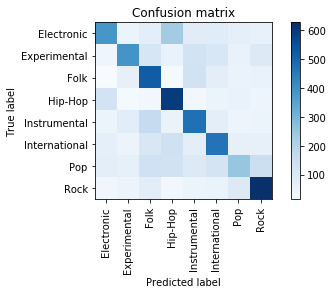

In [69]:
labels = ['Electronic', 'Experimental','Folk','Hip-Hop','Instrumental','International','Pop','Rock']
plt.imshow(confusion_matrix(y_test, rf_predictions,labels=labels),interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks,labels, rotation=90)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [37]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.25,random_state = 0) 
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [38]:
params = {
    'max_depth': 12,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 8,
    'n_gpus': 0,
    'eta': 0.3,
}

In [39]:
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.41      0.33      0.36      1040
           1       0.42      0.31      0.36       987
           2       0.39      0.50      0.44       937
           3       0.44      0.57      0.50       959
           4       0.39      0.39      0.39       993
           5       0.38      0.41      0.39      1029
           6       0.29      0.22      0.25      1031
           7       0.51      0.58      0.54      1018

    accuracy                           0.41      7994
   macro avg       0.41      0.41      0.40      7994
weighted avg       0.40      0.41      0.40      7994



In [41]:
lr_ovr = LogisticRegression(max_iter=1000)
lr1=lr_ovr.fit(X_train, y_train)
lr1_prediction=lr1.predict(X_test)
print(classification_report(y_test, lr1_prediction))

              precision    recall  f1-score   support

           0       0.28      0.25      0.26      1040
           1       0.25      0.13      0.17       987
           2       0.33      0.52      0.41       937
           3       0.36      0.60      0.45       959
           4       0.30      0.29      0.29       993
           5       0.31      0.20      0.24      1029
           6       0.22      0.09      0.13      1031
           7       0.44      0.62      0.51      1018

    accuracy                           0.33      7994
   macro avg       0.31      0.34      0.31      7994
weighted avg       0.31      0.33      0.31      7994



In [42]:
lr_mn = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=1000)
lr2=lr_mn.fit(X_train, y_train)
lr2_prediction=lr2.predict(X_test)
print(classification_report(y_test, lr2_prediction))

              precision    recall  f1-score   support

           0       0.28      0.25      0.26      1040
           1       0.25      0.13      0.17       987
           2       0.33      0.52      0.41       937
           3       0.36      0.60      0.45       959
           4       0.30      0.29      0.29       993
           5       0.31      0.20      0.24      1029
           6       0.22      0.09      0.13      1031
           7       0.44      0.62      0.51      1018

    accuracy                           0.33      7994
   macro avg       0.31      0.34      0.31      7994
weighted avg       0.31      0.33      0.31      7994

